In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from time import time
import pickle
#from datetime import *

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 18

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

import warnings
warnings.filterwarnings('ignore')

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score,mean_squared_error,recall_score,max_error,accuracy_score,confusion_matrix,r2_score

In [6]:
# Save the no scores, training, and testing data
# no_location =pd.read_csv('DB/new_data/no_location.csv')
# train_features=pd.read_csv('DB/new_data/training_features.csv')
# test_features=pd.read_csv('DB/new_data/testing_features.csv')
# train_labels=pd.read_csv('DB/new_data/training_labels.csv')
# test_labels=pd.read_csv('DB/new_data/testing_labels.csv')
#no_location =pd.read_csv('DB/data_fill/no_location.csv')

# Separate out the features and targets
df=pd.read_csv('DB/new_data/allData_resample_10m.csv')
targets = pd.DataFrame(df['location_no'])
features =df.drop(columns={'location','location_no','floor_no'})


# Replace the inf and -inf with nan (required for later imputation)
#features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
train_features, test_features, train_labels, test_labels = train_test_split(features, targets, test_size = 0.3, random_state = 42)

# train_features=pd.read_csv('DB/data_fill/training_features.csv')
# test_features=pd.read_csv('DB/data_fill/testing_features.csv')
# train_labels=pd.read_csv('DB/data_fill/training_labels.csv')
# test_labels=pd.read_csv('DB/data_fill/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)
print(np.unique(train_labels))
print(pd.value_counts(train_labels['location_no'].values))

Training Feature Size:  (390122, 10)
Testing Feature Size:   (167196, 10)
Training Labels Size:   (390122, 1)
Testing Labels Size:    (167196, 1)
[ 1  2  3  4  5  6  7  8  9 10]
9     52817
7     52736
1     51915
8     51911
5     40992
10    40793
4     32298
6     29938
3     18391
2     18331
dtype: int64


In [7]:
train_features.head(10)

,new_tsp,temperature,humidity,pressure,light,weekday,quarter,month,hour,day
321014,2019-10-21 06:10:00,23.574302,53.187723,1017.385253,260.376083,1,4,10,6,21
402902,2019-12-04 18:50:00,14.420389,44.484929,1025.523538,1.256912,3,4,12,18,4
189264,2019-10-13 16:00:00,24.775566,60.112217,996.167334,2.432000,7,4,10,16,13
328272,2019-12-10 15:50:00,16.013328,35.085506,1024.389998,1.708518,2,4,12,15,10
268143,2019-11-28 07:00:00,20.005251,43.333102,1018.871397,4.260986,4,4,11,7,28
329344,2019-12-18 02:30:00,15.819686,29.786049,1025.683959,1.213576,3,4,12,2,18
12035,2019-10-07 11:40:00,26.758929,56.312500,1017.273871,18.039009,1,4,10,11,7
528424,2020-05-26 08:20:00,24.179766,55.457934,1013.801446,348.162896,2,2,5,8,26
315210,2019-09-10 22:50:00,29.042226,47.384041,1014.839678,36.232583,2,3,9,22,10
490640,2019-09-06 23:00:00,27.187774,53.370339,1016.498432,0.486400,5,3,9,23,6


In [13]:

#print(pd.value_counts(targets.heavalues))

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [14]:
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features.drop('new_tsp', axis=1))

# Transform both training data and testing data
X = imputer.transform(train_features.drop('new_tsp', axis=1))
X_test = imputer.transform(test_features.drop('new_tsp', axis=1))
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [15]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [16]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

print('X Size: ', X.shape)
print('X_test Size:  ', X_test.shape)
print('y Size:  ', y.shape)
print('y_test Size:   ', y_test.shape)

X Size:  (390122, 9)
X_test Size:   (167196, 9)
y Size:   (390122,)
y_test Size:    (167196,)


Linear Regression

Support Vector Machine Regression

Random Forest Regression

Gradient Boosting Regression

K-Nearest Neighbors Regression

In [17]:
# Function to calculate mean absolute error    
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def pro_pred(y_pred):
    propre=np.round(y_pred)
    return propre

def make_confusion_matrix(y_test, model_pred):
    cf_m = confusion_matrix(y_test, model_pred)
    return cf_m

def evaluate(y_test, model_pred):
    model_pred=pro_pred(model_pred)
    #print("test value size...", pd.value_counts(y_test))
    #print("predicted value size...", pd.value_counts(model_pred))
    model_mae = mae(y_test, model_pred)
    model_mse = mse(y_test, model_pred)
    # Compute confusion matrix
    #print(cnf_matrix)
    model_r2_score= r2_score(y_test, model_pred)
    model_max_error= max_error(y_test, model_pred)
    # save the model to disk
    return model_mae,model_mse,model_r2_score,model_max_error, model_pred 
    

# Takes in a model, trains the model, and evaluates the model on the test set
def fit(model,filename):
    # Train the model
    model.fit(X, y)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_pred=pro_pred(model_pred)
    #print("test value size...", pd.value_counts(y_test))
    #print("predicted value size...", pd.value_counts(model_pred))
    model_mae = mae(y_test, model_pred)
    model_mse = mse(y_test, model_pred)
    # Compute confusion matrix
    #print(cnf_matrix)
    model_r2_score= r2_score(y_test, model_pred)
    model_max_error= max_error(y_test, model_pred)
    print(model_pred)
    # save the model to disk
    filename = 'stored_model/'+filename+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    return model_mae,model_mse,model_r2_score,model_max_error, model_pred 

In [18]:
%%time
t0 = time()
lr = LinearRegression()
lr_mae,lr_mse,lr_r2_score,lr_max_error,lr_pred = fit_and_evaluate(lr,'lr')
t1 = time()
lr_t=t1-t0

print('Linear Regression Performance on the test set: \n MAE = %0.4f' % lr_mae,
      "\n MSE = %0.4f "% lr_mse,
      "\n Max error = %0.4f "% lr_max_error,
      "\n r2_sccore = %0.4f' "% lr_r2_score,   
      "\n time = %0.4f' "% lr_t)

print(np.unique(lr_pred))
#"\n consumed time =  %0.4f"%(t1 - t0))
# print(lr_cnf_matrix)
# plt.figure()
# plot_confusion_matrix(lr_cnf_matrix, title='Confusion matrix')
# plt.show()
#pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])
#0.42

NameError: name 'fit_and_evaluate' is not defined

In [ ]:
%%timeit
t0 = time()
#svm = SVR(C = 1000, gamma = 0.1)
svm = SVR(C = 1, gamma = 0.15,cache_size=500)
svm_mae,svm_mse,svm_r2_score,svm_max_error,svm_pred= fit_and_evaluate(svm,'svm')
t1 = time()
svm_t=t1-t0
print('Random forest Performance on the test set: \n MAE = %0.4f' % svm_mae,
      "\n MSE = %0.4f "% svm_mse,
      "\n Max error = %0.4f "% svm_r2_score,
      "\n r2_sccore = %0.4f' "% svm_max_error, 
      "\n time = %0.4f' "% svm_t)

In [ ]:
# %%timeit
# t0 = time()

# svc = SVC(kernel='poly', degree=2, gamma='auto', C=1)

# t1 = time()
# svm_t=t1-t0


# svc_mae,svc_mse,svc_r2_score,svc_max_error,svc_pred= fit_and_evaluate(svc,'svc')

# print("Predicted labels:", clf.predict(X))

In [9]:
%%time
t0 = time()
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae,rf_mse,rf_r2_score,rf_max_error, rf_pred= fit_and_evaluate(random_forest,'rf')
t1 = time()
rf_t=t1-t0
print('Random forest Performance on the test set: \n MAE = %0.4f' % random_forest_mae,
      "\n MSE = %0.4f "% rf_mse,
      "\n Max error = %0.4f "% rf_r2_score,
      "\n r2_sccore = %0.4f' "% rf_max_error, 
      "\n time = %0.4f' "% rf_t)

[ 5.  2. 10. ...  6.  5.  1.]
Random forest Performance on the test set: 
 MAE = 0.0371 
 MSE = 0.0894  
 Max error = 0.9902  
 r2_sccore = 8.0000'  
 time = 286.0403' 
CPU times: user 4min 45s, sys: 216 ms, total: 4min 45s
Wall time: 4min 46s


In [10]:
%%time
t0 = time()
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae, gb_mse,gb_r2_score,gb_max_error,gb_pred= fit_and_evaluate(gradient_boosted,'gb')
t1 = time()
gb_t=t1-t0

print('Gradient Boosted Regression Performance on the test set: \n MAE = %0.4f' % gradient_boosted_mae,
      "\n MSE = %0.4f "% gb_mse,
      "\n Max error = %0.4f "% gb_r2_score,
      "\n r2_sccore = %0.4f' "% gb_max_error,
      "\n time = %0.4f' "% gb_t)

[8. 2. 9. ... 7. 7. 4.]
Gradient Boosted Regression Performance on the test set: 
 MAE = 1.6920 
 MSE = 4.5818  
 Max error = 0.4956  
 r2_sccore = 8.0000'  
 time = 122.5078' 
CPU times: user 2min 2s, sys: 4 ms, total: 2min 2s
Wall time: 2min 2s


In [11]:
%%time
t0 = time()
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae,knn_mse,knn_r2_score,knn_max_error,knn_pred = fit_and_evaluate(knn,'knn')
t1 = time()
knn_t=t1-t0
print('K-NeighborsRegression Performance on the test set: \n MAE = %0.4f' % knn_mae,
      "\n MSE = %0.4f "% knn_mse,
      "\n Max error = %0.4f "%knn_r2_score,
      "\n r2_sccore = %0.4f' "% knn_max_error, 
      "\n time = %0.4f' "% knn_t)

[ 5.  2. 10. ...  7.  5.  1.]
K-NeighborsRegression Performance on the test set: 
 MAE = 0.0932 
 MSE = 0.2506  
 Max error = 0.9724  
 r2_sccore = 9.0000'  
 time = 64.1869' 
CPU times: user 1min 4s, sys: 308 ms, total: 1min 4s
Wall time: 1min 4s


In [ ]:
#without process lr MAE = 1.5687 svm MAE = 1.2624 random forest MAE = 0.4122 GB MAE = 0.9731  KNN MAE = 0.7794
#without process lr MAE = 1.5356  svm MAE = 1.2192 random forest MAE = 0.3905 GB MAE =  0.9134  KNN MAE = 0.7670

In [12]:
print(lr_mae, random_forest_mae, gradient_boosted_mae, knn_mae)
print(lr_t, rf_t, gb_t, knn_t)

#2.201003211178209 0.11234611537680582 1.062275800350447 0.18753431147676597
#0.06550335884094238 59.31387782096863 18.222867965698242 37.90412163734436

2.537984028404262 0.03711525017622129 1.6920376983033443 0.09316957564752261
0.20621323585510254 286.04032492637634 122.5078375339508 64.18692636489868


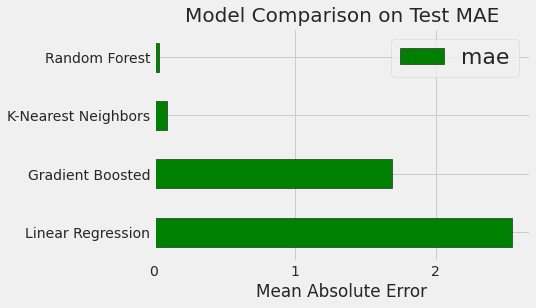

In [13]:
dt = str(time())
plt.style.use('fivethirtyeight')
#figsize(8, 6)
model_comparison = pd.DataFrame({'model': ['Linear Regression',#'Support Vector Machine',svm_mae, 
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)

plt.title('Model Comparison on Test MAE', size = 20);
plt.savefig('./images/maedropna_withprocess'+dt+'.png',quality=100,dpi=500) 

In [ ]:
dt = str(time())

plt.style.use('fivethirtyeight')

time_comparison = pd.DataFrame({'model': ['Linear Regression',#'Support Vector Machine',svm_mae, 
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': np.array([lr_t, rf_t, gb_t, knn_t]).astype(float)})

time_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); 
plt.xlabel('Time Comparison'); 
plt.xticks(size = 14)

plt.title('Scikit Learn Time Comparison', size = 20);
plt.savefig('./images/sk_time'+dt+'.png',quality=100,dpi=500) 
plt.show()

In [ ]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [10,20,50,80,100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [ ]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
# Fit on the training data
t0 = time()
random_cv.fit(X, y)
t1 = time()
print('Done learning {0:.3f} sec'.format(t1-t0))

In [ ]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_results.head(10)

In [ ]:
random_cv.best_estimator_

In [ ]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [10,20,50,70,100, 150, 200, 250, 300, 350, 400, 450, 500,
                               550, 600, 650, 700, 750, 800,1000,1100,1200]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# Fit the grid search
grid_search.fit(X, y)

In [ ]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)
# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [ ]:
results.sort_values('mean_test_score', ascending = False).head(5)

In [ ]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

In [ ]:
%%timeit -n 1 -r 5
#https://ipython.readthedocs.io/en/stable/interactive/magics.html
default_model.fit(X, y)

In [ ]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

In [ ]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=18)
# Label the plot
plt.xlabel('Location_No'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

In [ ]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution');
#plt.title('Distribution of Residuals');

In [ ]:
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

In [ ]:
# Function to calculate accuracy
def accracy(y_true, total):
    true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
    true_positives = len(admissions[true_positive_filter])
    true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
    true_negatives = len(admissions[true_negative_filter])
    print(true_positives)
    print(true_negatives)

    
# Function to calculate sensity
def sensitivity(y_true, total):
    true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
    true_positives = len(admissions[true_positive_filter])
    false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
    false_negatives = len(admissions[false_negative_filter])
    sensitivity = true_positives / float((true_positives + false_negatives))
    print(sensitivity)

# Function to calculate specificity 
def specificity():
    true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
    true_positives = len(admissions[true_positive_filter])
    false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
    false_negatives = len(admissions[false_negative_filter])
    true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
    true_negatives = len(admissions[true_negative_filter])
    false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
    false_positives = len(admissions[false_positive_filter])
    specificity = (true_negatives) / float((false_positives + true_negatives))

In [ ]:
def plot_confusion_matrix(cm,title):
    cmap=plt.cm.Blues
    leng=len(cm)
    classes=np.arange(1, leng+1)
    dt = str(time())
    print(classes)
    #harvest = np.random.randint(4, 10, (10, 10))
    fig, ax = plt.subplots()
    im = ax.imshow(cm,cmap="YlGnBu",vmin=0, vmax=500)
    sns.set_theme()
    #im = sns.heatmap(cm,linewidths=.5,cmap=cmap, vmin=0, vmax=500)
    sticks=np.arange(0,len(classes))

    # We want to show all ticks...
    ax.set_xticks(sticks)
    ax.set_yticks(sticks)
    #axes.set_xticklabels(["A", "B", "C", "D", "E"])
    #ax.set_yticks(classes)
    # ... and label them with the respective list entries
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    #thresh = cm.max() / 10.

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in sticks:
        for j in sticks:
            text = ax.text(j, i, cm[i, j],ha="center", va="center",fontsize=10)

    ax.set_title(title)
    fig.tight_layout()
    plt.savefig('./images/maedropna_withprocess'+title+dt+'.png',quality=100,dpi=500) 
    plt.show()

In [ ]:
knn_cnf_matrix= make_confusion_matrix(y_test, knn_pred)
print(knn_cnf_matrix)
plt.figure(figsize=(8,10))
plot_confusion_matrix(knn_cnf_matrix, title='KNN Confusion matrix')
plt.show()

In [ ]:
rf_cnf_matrix= make_confusion_matrix(y_test, rf_pred)
print(rf_cnf_matrix)
plt.figure(figsize=(6,8))
plot_confusion_matrix(rf_cnf_matrix, title='RF Confusion matrix')
plt.show()

In [ ]:
gb_cnf_matrix= make_confusion_matrix(y_test, gb_pred)
gb_cnf_matrix=gb_cnf_matrix[:10,:10]
print(gb_cnf_matrix)
plt.figure(figsize=(6,8))
plot_confusion_matrix(gb_cnf_matrix, title='GB Confusion matrix')
plt.show()

In [ ]:
lr_cnf_matrix= make_confusion_matrix(y_test, lr_pred)
print(np.unique(lr_pred))

lr_cnf_matrix=lr_cnf_matrix[:10,:10]
print(lr_cnf_matrix)
plt.figure(figsize=(6,8))
plot_confusion_matrix(lr_cnf_matrix, title='LR Confusion matrix')
plt.show()
# pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])